## Problem: Course Schedule

You are given an array `prerequisites` where `prerequisites[i] = [a, b]` indicates that you must take course b first if you want to take course `a`.

The pair `[0, 1]`, indicates that must take course `1` before taking course `0`.

There are a total of `numCourses` courses you are required to take, labeled from `0` to `numCourses - 1`.

Return `true` if it is possible to finish all courses, otherwise return `false`.

### Hint:

We first build a graph of nodes (courses), where a node from A to B means A is the course and B is the prerequisite for A. The **ONLY** problem where you cannot finish all the courses, when a at least one cycle exists.

Check whether a cycle exists, on every course

In [ ]:
# my sol
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # build the adj list
        adj = {i: [] for i in range(numCourses)}
        for curr, pre in prerequisites:
            adj[curr] = adj[curr] + [pre]

        print("adjlist is", adj)

        # visit is a list
        def dfs(node, visit):
            """this will return False if a cycle is found"""
            if node in visit:
                print("a cycle is found at", node)
                return False

            visit.add(node)

            print("current node is", node, "visit is", visit)

            for nb in adj[node]:
                if not dfs(nb, visit):
                    return False
            # must remove here
            visit.remove(node)
            print("returning true/no cycle for", node, "visit is", visit)

            return True

        # check every node as a source
        # this is because the loops/networks can be disconnected
        for src in range(numCourses):
            if not dfs(src, set()):
                return False

        return True

In [ ]:
# their sol - memoization way more efficient
class Solution:
    def canFinish(numCourses, prerequisites):
        # this is the adj list
        preMap = {i: [] for i in range(numCourses)}
        for crs, pre in prerequisites:
            preMap[crs].append(pre)

        visiting = set()

        # uses a global visiting set across all DFS calls
        def dfs(crs):
            # a loop is found
            if crs in visiting:
                return False
            # reached the end, THIS COURSE CAN BE COMPLETED
            if preMap[crs] == []:
                return True

            # add this to history
            visiting.add(crs)
            for pre in preMap[crs]:
                if not dfs(pre):
                    return False
            # backtracking to allow further exploration
            visiting.remove(crs)
            # this is a form a memoization
            # this course can be completed, just make it zero prereqs! - signals no cycle starting from this node
            preMap[crs] = []
            return True

        for c in range(numCourses):
            if not dfs(c):
                return False
        return True


In [ ]:
# even faster
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # check whether this course can be taken
        def check(course):
            if course in taken:
                return True
            # this is reset every source node
            # this is basically the visit hashset
            if course in current_path:
                return False
            current_path.add(course)
            for pre in relation[course]:
                if not check(pre):
                    return False
            taken.add(course)
            return True

        relation = {i: [] for i in range(numCourses)}
        # graph relationship
        for course1, course2 in prerequisites:
            relation[course1].append(course2)

        # courses which CAN DEFINITELY BE TAKEN
        taken = set()
        for course in range(numCourses):
            current_path = set()
            if not check(course):
                return False
        return True


## Problem: Find the Maximum Value in a graph


We represent our graph as an adjacency list where `parent_name:[value,[child1_name,child2_name...]]`. Note that the below graph contains a cycle, and we use `visited` to prevent infinite traversal.

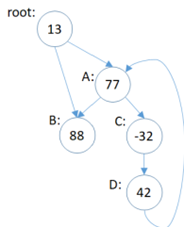

In [ ]:
graph2 = {
    "root": [13, ["A", "B"]],
    "A": [77, ["B", "C"]],
    "B": [88, []],
    "C": [-32, ["D"]],
    "D": [42, ["A"]],
}  # D --> A

In [ ]:
def graph_max(graph):
    """Walk a graph, returning the maximum value in a (non-empty) graph.
    However, there might be cycles, so need to be careful not to
    get stuck in them!
    """

    visited = set()

    def node_max(node_name):
        visited.add(node_name)
        val = graph[node_name][0]
        children = graph[node_name][1]
        # explore all unvisited nodes in a BFS way
        new_children = [c for c in children if c not in visited]
        # as long as theres one child
        if new_children:
            return max(val, max(node_max(child) for child in new_children))
        return val

    return node_max("root")

In [3]:
graph_max(graph2)

88

## Keys and Rooms

There are n rooms labeled from `0` to `n - 1` and all the rooms are locked except for room `0`. Your goal is to visit all the rooms. However, you cannot enter a locked room without having its key.

When you visit a room, you may find a set of distinct keys in it. Each key has a number on it, denoting which room it unlocks, and you can take all of them with you to unlock the other rooms.

Given an array rooms where `rooms[i]` is the set of keys that you can obtain if you visited room `i`, return true if you can visit all the rooms, or false otherwise.

In [ ]:
# this edits the visited set in place
class Solution:
    def canVisitAllRooms(self, rooms: List[List[int]]):
        visited = set()
        # this is passing in global variables
        self.traversal(rooms, 0, visited)
        if len(visited) == len(rooms):
            return True
        else:
            return False

    def traversal(self, rooms, current_room, visited):
        # print("currently at room",current_room)
        visited.add(current_room)

        for child_room in rooms[current_room]:
            # only explore if not visited
            if child_room not in visited:
                # print("going to this room",child_room)
                self.traversal(rooms, child_room, visited)


## Leaf Similar Trees (Easy)

Traverse all the leafs of a tree, from left to right

Consider all the leaves of a binary tree, from left to right order, the values of those leaves form a leaf value sequence.

Two binary trees are considered leaf-similar if their leaf value sequence is the same.

Return true if and only if the two given trees with head nodes root1 and root2 are leaf-similar.

In [ ]:
# my code
class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def traverse(node):
            # we want postorder traversal
            # base case leaf node
            if node.left == None and node.right == None:
                return [node.val]

            # right has a node
            elif node.left == None:
                visited = traverse(node.right)

            # left has a node
            elif node.right == None:
                visited = traverse(node.left)

            # both have nodes
            else:
                visited = traverse(node.left) + traverse(node.right)

            return visited

        return traverse(root1) == traverse(root2)

In [ ]:
# better sol
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def getLeaves(root) -> list:
            # if we've reached an empty node
            # THIS IS A VERY USEFUL TECHNIQUE THAT EVADES ALOT OF EDGE CASES!
            if not root:
                return []
            # reached a leaf node
            if not root.left and not root.right:
                return [root.val]
            # concat the sequence from left and the sequence from right
            return getLeaves(root.left) + getLeaves(root.right)

        leaves1 = getLeaves(root1)
        leaves2 = getLeaves(root2)

        return leaves1 == leaves2